<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Ed9ar/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

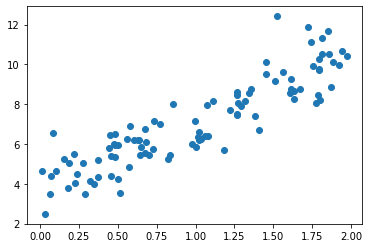

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

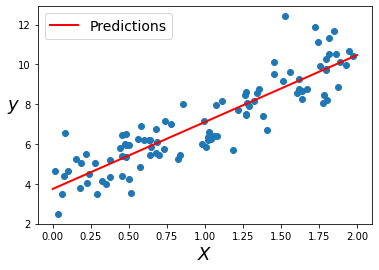

In [8]:
# construct best fit line

X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

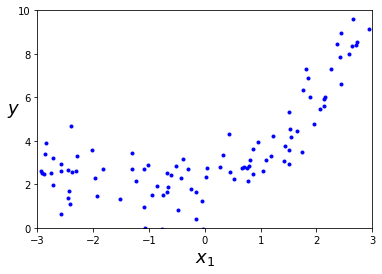

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

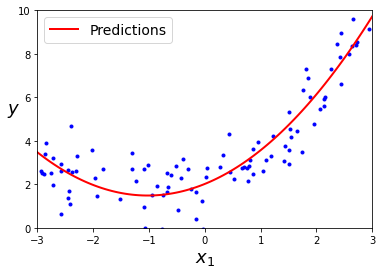

In [22]:

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

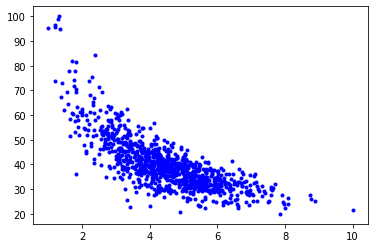

In [27]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


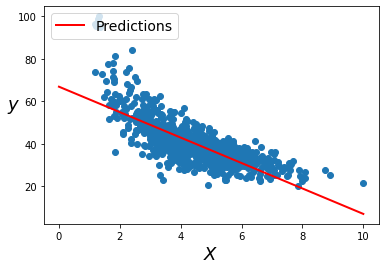

In [47]:
#lineal fit y visualizacion

from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [39]:
 #Ecuacion
 linear_reg.coef_, linear_reg.intercept_

(array([-5.98882699]), 66.83650741226988)

y = -5.98 X + 66.83

In [44]:
X_test

,Number of Units
545,4.591665
298,3.769674
109,2.866500
837,5.684718
194,3.294658
...,...
237,3.514743
429,4.225077
786,5.484125
399,4.126948


In [95]:
y_pred = linear_reg.predict(X_test)
y_pred

array([39.33781957, 44.26058238, 49.66953663, 32.79171748, 47.10537261,
       37.98201755, 45.42071108, 36.22515778, 33.5758441 , 41.87191428,
       33.12946768, 23.05091467, 35.07429172, 43.20061834, 38.10564826,
       43.63593586, 49.2554343 , 44.21893763, 55.20004529, 44.83870093,
       30.76611387, 36.61690197, 33.17657165, 34.87833619, 35.29349453,
       46.36166153, 38.96677761, 52.82210512, 41.85260809, 35.26339328,
       54.54553752, 41.78713832, 48.57173789, 38.02261075, 42.41802969,
       28.59633034, 39.01614668, 48.54266737, 30.99728625, 48.69255853,
       41.67367994, 46.85384244, 24.04090657, 44.3749518 , 40.3026443 ,
       48.53462277, 14.24928761, 28.44909769, 37.36510679, 29.93817969,
       30.64777855, 27.71163587, 49.58572564, 41.81131528, 58.57765387,
       52.82625176, 41.24011095, 30.80081126, 48.25938282, 30.13464752,
       42.33522443, 51.3655144 , 33.060437  , 42.85495078, 35.37572884,
       47.40402361, 48.05704533, 30.41861982, 39.89906313, 33.51

In [96]:
import sklearn.metrics as metrics

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


In [ ]:
#polinomial

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


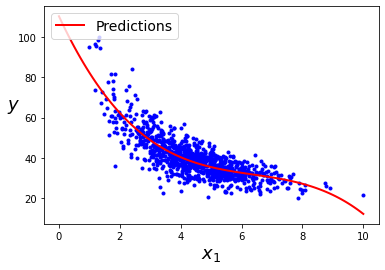

In [64]:

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [61]:
 lin_reg.coef_, lin_reg.intercept_

(array([-32.54637447,   4.74715887,  -0.24753202]), 110.3994754620544)

Ecuacion de la regresion polinomial

y = -32.54x^3 + 4.74x^2 - 0.24x + 110.39

In [66]:
X_poly_test = poly_features.fit_transform(X_test)
y_pred_poli = lin_reg.predict(X_poly_test)
y_pred_poli

array([37.08057313, 41.90950345, 50.28160646, 33.31831385, 45.84720149,
       36.103027  , 43.40016773, 35.01206927, 33.66458595, 39.28863515,
       33.46506035, 29.46127038, 34.38852517, 40.67561228, 36.18693986,
       41.16812055, 49.50352111, 41.85877607, 63.26736944, 42.63338834,
       32.4990823 , 35.23982021, 33.48580701, 34.28859713, 34.50236272,
       44.72400472, 36.80015059, 57.06158315, 39.26971997, 34.48659935,
       61.45930099, 39.20583106, 48.27236616, 36.13046862, 39.83809724,
       31.68970711, 36.83688277, 48.22146765, 32.58832309, 48.48516192,
       39.09604008, 45.45952682, 29.91090546, 42.04978713, 37.85870194,
       48.2074033 , 23.04885622, 31.63563361, 35.69894053, 32.18557923,
       32.45372261, 31.36411329, 50.12212311, 39.22937845, 73.89538842,
       57.07155181, 38.68715745, 32.51242246, 47.73156465, 32.25923215,
       39.75297323, 53.73485211, 33.43478288, 40.29823157, 34.54564289,
       46.31805026, 47.3883527 , 32.36644945, 37.52437014, 33.63

In [67]:

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_poli))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poli)))
print('r2_score',r2_score(y_test, y_pred_poli))

Error medio Absoluto (MAE): 4.386320983977357
Root Mean Squared Error: 5.503891280141207
r2_score 0.7672025391579643


El error se redujó bastante en comparación a la regresión lineal simple, además de que el R^2 incremento en alrededor de un 10%

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


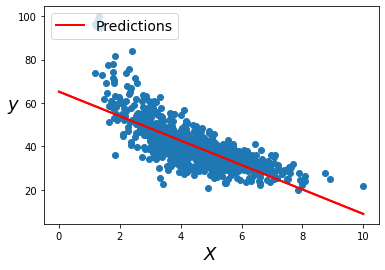

In [81]:
#Ridge
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=100, fit_intercept=True)

ridgeReg.fit(X_train,y_train)
X_fit = np.linspace(0, 10, 100)
y_fit = ridgeReg.predict(X_fit[:, np.newaxis])


plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")

plt.scatter(X_train, y_train)

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)



In [82]:
train_score_ridge

0.5726365475961237

In [83]:
test_score_ridge 

0.605404173687225

In [84]:
y_pred_ridge = ridgeReg.predict(X_test)
y_pred_ridge

array([39.3796499 , 44.01084284, 49.09943064, 33.22126629, 46.68713926,
       38.10415055, 45.10225838, 36.45134767, 33.95894994, 41.76365295,
       33.53901191, 24.05740059, 35.36864615, 43.01365932, 38.22045875,
       43.42319345, 48.70985514, 43.97166467, 54.30237332, 44.55472007,
       31.31563697, 36.81988927, 33.58332596, 35.18429685, 35.57486582,
       45.98747738, 39.03058435, 52.06527595, 41.74549024, 35.54654742,
       53.68663132, 41.68389818, 48.06665332, 38.14233946, 42.27742254,
       29.27436734, 39.07702934, 48.03930462, 31.53311725, 48.18031788,
       41.57715981, 46.45050694, 24.98875635, 44.11843829, 40.28732912,
       48.03173649, 15.77708428, 29.13585513, 37.52377875, 30.53674042,
       31.20431052, 28.44207236, 49.02058369, 41.70664316, 57.47992982,
       52.06917698, 41.16927064, 31.34827926, 47.7727987 , 30.72157167,
       42.19952175, 50.6949575 , 33.47406984, 42.68846527, 35.65222947,
       46.96810148, 47.58244545, 30.98872461, 39.90765161, 33.90

In [85]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))


Error medio Absoluto (MAE): 5.063000806731028
Root Mean Squared Error: 7.165672754549874
r2_score 0.605404173687225


In [ ]:
|#lasso


Lasso Model............................................

The train score for ls model is 0.060246166060257456
The test score for ls model is 0.06033988967556758


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


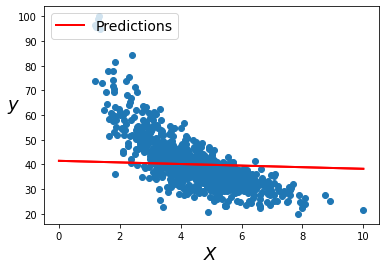

In [77]:
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)



X_fit = np.linspace(0, 10, 100)
y_fit = lasso.predict(X_fit[:, np.newaxis])


plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")

plt.scatter(X_train, y_train)


print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

In [86]:

y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([40.00602201, 40.27121458, 40.56259861, 39.65337905, 40.42446536,
       39.93298403, 40.3337115 , 39.8383408 , 39.69562048, 40.14253541,
       39.67157388, 39.12863539, 39.77634287, 40.2141136 , 39.9396441 ,
       40.23756445, 40.54029064, 40.26897115, 40.86053087, 40.30235822,
       39.54425841, 39.85944433, 39.6741114 , 39.76578661, 39.78815147,
       40.38440114, 39.98603372, 40.73242962, 40.14149537, 39.7865299 ,
       40.82527209, 40.13796847, 40.50345945, 39.93517082, 40.17195502,
       39.42737069, 39.98869327, 40.5018934 , 39.55671182, 40.50996814,
       40.13185639, 40.41091526, 39.18196693, 40.27737574, 40.05799777,
       40.50146003, 38.65448577, 39.41943917, 39.89975063, 39.49965703,
       39.5378836 , 39.3797116 , 40.55808366, 40.1392709 , 41.04248493,
       40.732653  , 40.10849973, 39.54612758, 40.48663267, 39.51024088,
       40.16749424, 40.65396209, 39.66785515, 40.19549225, 39.79258149,
       40.44055389, 40.47573261, 39.52553867, 40.03625658, 39.69

In [87]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2_score(y_test, y_pred_lasso))

Error medio Absoluto (MAE): 7.865874818596601
Root Mean Squared Error: 11.057733591834
r2_score 0.06033988967556758


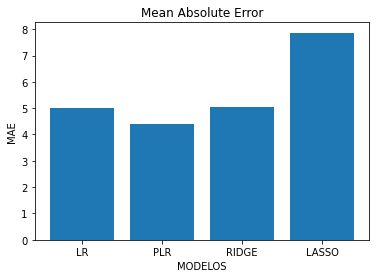

In [97]:
import matplotlib.pyplot as plot



MAE_lr = metrics.mean_absolute_error(y_test, y_pred)
R_lr = r2_score(y_test, y_pred)

MAE_poli = metrics.mean_absolute_error(y_test, y_pred_poli)
R_poli = r2_score(y_test, y_pred_poli)

MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
R_ridge = r2_score(y_test, y_pred_ridge)

MAE_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
R_lasso = r2_score(y_test, y_pred_lasso)

Modelos = ['LR', 'PLR', 'RIDGE', 'LASSO']

Valores = [MAE_lr, MAE_poli, MAE_ridge, MAE_lasso] 

plot.bar(x=Modelos, height=Valores)
plot.title('Mean Absolute Error')
plot.xlabel('MODELOS')
plot.ylabel('MAE')


plot.show() #dibujamos el histograma



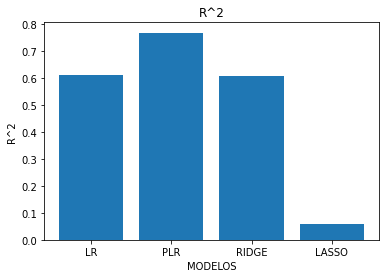

In [99]:
Valores = [R_lr, R_poli, R_ridge,R_lasso] 

plot.bar(x=Modelos, height=Valores)
plot.title('R^2')
plot.xlabel('MODELOS')
plot.ylabel('R^2')


plot.show() #dibujamos el histograma

Al analizar el desempeño de los modelos resulta más que evidente que la mejor opción es una regresión lineal polinomial, a los demás mmodelos les falta complejidad mientras que Lasso arroja resultados completamente fuera de lo esperado, una ecuación de tercer grado muestra buen desempeño sin llegar a sobreentrenar. Se utilizaron 90% de los datos para entrenamiento y 10% para validar. El MAE sigue siendo un poco elevado, pero los valores de R^2 rondan el 0.8 por lo que sigue siendo el mejor de los modelos. Significa que la relación entre los valores de predicción y los reales no son tan distintos.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [102]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


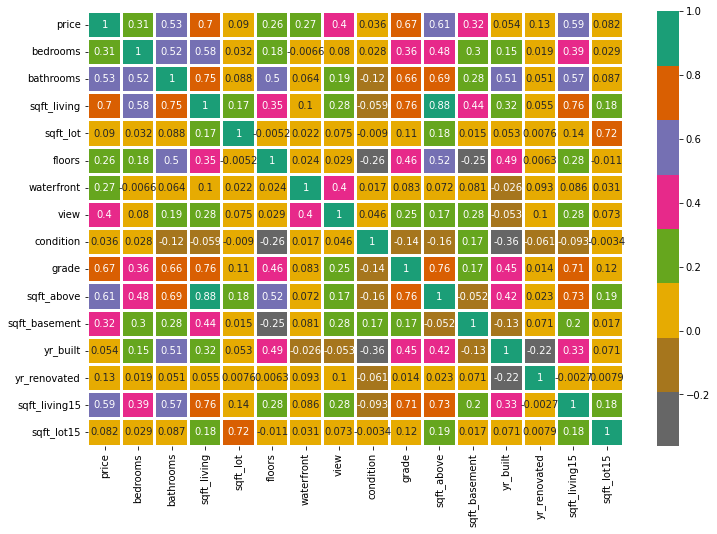

In [104]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [105]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [108]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [109]:
 linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

In [110]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
3834,2,1.00,1050,6317,1.5,0,0,4,7,1050,0,1913,0,1600,9616
1348,4,2.25,2040,9565,1.0,0,0,3,8,1400,640,1959,0,1890,8580
20366,4,2.50,2500,4000,2.0,0,0,3,8,2500,0,2014,0,1480,4300
16617,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,1860,19998
20925,3,3.00,1670,4440,1.0,0,0,3,7,1670,0,2014,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13586,3,2.25,1600,45613,2.0,0,0,4,8,1600,0,1983,0,2320,43005
21221,3,2.50,1550,3569,2.0,0,0,3,7,1550,0,2011,0,2095,3402
4016,3,2.00,1290,5700,1.0,0,0,5,7,1290,0,1950,0,1160,5700
5399,4,2.50,1820,3899,2.0,0,0,3,7,1820,0,1999,0,1820,3899


In [111]:
y_pred = linear_reg.predict(X_test)
y_pred

array([[497229.46928379],
       [562952.6540355 ],
       [463759.36017187],
       ...,
       [401245.25396963],
       [301687.78726906],
       [635653.16972738]])

In [113]:
import sklearn.metrics as metrics

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [115]:
#polinomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_


(array([[ 3.17395792e+02, -2.70130239e+02,  1.30610945e+01,
         -1.40757708e+01,  2.62496809e+00,  3.24633595e+00,
         -8.08938960e-01,  3.60826046e-01, -6.17577143e-01,
          1.54124566e-01,  9.07922470e-01, -2.42302232e-01,
          1.57944629e-01, -4.12303248e-01, -1.89494993e+01,
          2.57497810e-01,  3.31180922e-01,  2.56156276e+01,
         -9.51793255e-02, -6.36531339e-01,  6.24165339e-01,
         -6.14143248e-02,  9.57006257e-01,  1.21507890e+00,
          1.85183285e+01,  7.24785462e+00,  3.94289500e+02,
          4.24069045e+00,  5.07845227e+00, -1.89095034e+01,
         -4.03258004e-01, -2.08156624e+02, -6.15751437e+01,
         -4.82898236e-01, -6.40532068e-02, -8.73845428e-02,
         -1.73829295e-01, -5.97615346e-01, -1.69018199e+02,
         -3.91260224e+01, -1.76779529e+02, -4.47565136e+00,
         -1.70541213e+02,  1.09037853e+02, -3.48181375e-01,
          5.54961266e-03, -3.10542727e+02, -2.04577118e+01,
         -5.10909707e+01,  1.44081886e+0

In [124]:
X_poly_test = poly_features.fit_transform(X_test)
y_pred_poli = lin_reg.predict(X_poly_test)
y_pred_poli

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_poli))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poli)))
print('r2_score',r2_score(y_test, y_pred_poli))

Error medio Absoluto (MAE): 127640.87573988685
Root Mean Squared Error: 212376.50824233124
r2_score 0.7137146909613681


In [117]:
#ridge

In [125]:
#Ridge
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=100, fit_intercept=True)

ridgeReg.fit(X_train,y_train)

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

y_pred_ridge = ridgeReg.predict(X_test)



In [126]:
y_pred_ridge


array([[495899.53727421],
       [559490.06979968],
       [464829.84387999],
       ...,
       [400333.9203047 ],
       [301416.78259649],
       [633958.69643411]])

In [127]:

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))

Error medio Absoluto (MAE): 138203.47631588625
Root Mean Squared Error: 234583.47523048488
r2_score 0.6507141904983357


In [129]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)


print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso


The train score for ls model is 0.652919545409236
The test score for ls model is 0.657938064922335


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([497181.11014379, 562963.17455512, 463784.62466724, ...,
       401195.30155035, 301685.24582524, 635675.49353882])

In [130]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2_score(y_test, y_pred_lasso))

Error medio Absoluto (MAE): 137484.46604257784
Root Mean Squared Error: 232144.99192258602
r2_score 0.657938064922335


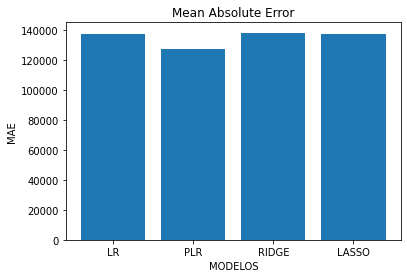

In [131]:

MAE_lr = metrics.mean_absolute_error(y_test, y_pred)
R_lr = r2_score(y_test, y_pred)

MAE_poli = metrics.mean_absolute_error(y_test, y_pred_poli)
R_poli = r2_score(y_test, y_pred_poli)

MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
R_ridge = r2_score(y_test, y_pred_ridge)

MAE_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
R_lasso = r2_score(y_test, y_pred_lasso)

Modelos = ['LR', 'PLR', 'RIDGE', 'LASSO']

Valores = [MAE_lr, MAE_poli, MAE_ridge, MAE_lasso] 

plot.bar(x=Modelos, height=Valores)
plot.title('Mean Absolute Error')
plot.xlabel('MODELOS')
plot.ylabel('MAE')


plot.show()

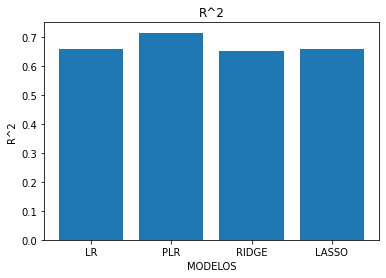

In [132]:
Valores = [R_lr, R_poli, R_ridge,R_lasso] 

plot.bar(x=Modelos, height=Valores)
plot.title('R^2')
plot.xlabel('MODELOS')
plot.ylabel('R^2')


plot.show() 

Se obtuvieron valores muy altos para el MAE debido a los obtenidos desde el principio en la lectura del conjunto de tareas. En cuanto al r^2 fue posible observar que los cuatro modelos tienen un desempeño similar rondando un valor de entre 0.65 y 0.70 pero al igual que en el caso anterior el mejor modelo es el polinomial. 